<a href="https://colab.research.google.com/github/DmitryPavlyuk/ai-aviation-engineering/blob/main/02.PredictiveMaintenance/presentation2.1.NASA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.4. Predictive Models: NASA Turbofan Jet Engine Data Set

Module: Artificial Intelligence for Aviation Engineering

Instructor: prof. Dmitry Pavlyuk

# Data Set

CMAPSS Jet Engine Simulated Data

https://data.nasa.gov/Aerospace/CMAPSS-Jet-Engine-Simulated-Data/ff5v-kuh6/about_data


Data sets consists of multiple multivariate time series. Each data set is further divided into training and test subsets. Each time series is from a different engine i.e., the data can be considered to be from a fleet of engines of the same type. Each engine starts with different degrees of initial wear and manufacturing variation which is unknown to the user. This wear and variation is considered normal, i.e., it is not considered a fault condition. There are three operational settings that have a substantial effect on engine performance.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
column_names = ['engine', 'time', 'op_setting_1', 'op_setting_2',
                'op_setting_3'] + [f'sm_{i}' for i in range(1, 22)]
sensors={}
dict_list=[ "(Fan inlet temperature) (◦R)",
"(LPC outlet temperature) (◦R)",
"(HPC outlet temperature) (◦R)",
"(LPT outlet temperature) (◦R)",
"(Fan inlet Pressure) (psia)",
"(bypass-duct pressure) (psia)",
"(HPC outlet pressure) (psia)",
"(Physical fan speed) (rpm)",
"(Physical core speed) (rpm)",
"(Engine pressure ratio(P50/P2)",
"(HPC outlet Static pressure) (psia)",
"(Ratio of fuel flow to Ps30) (pps/psia)",
"(Corrected fan speed) (rpm)",
"(Corrected core speed) (rpm)",
"(Bypass Ratio) ",
"(Burner fuel-air ratio)",
"(Bleed Enthalpy)",
"(Required fan speed)",
"(Required fan conversion speed)",
"(High-pressure turbines Cool air flow)",
"(Low-pressure turbines Cool air flow)" ]

i=1
for x in dict_list :
    sensors[f'sm_{i}']=x
    i+=1

In [3]:
data_root = "https://raw.githubusercontent.com/DmitryPavlyuk/ai-aviation-engineering/refs/heads/main/CMAPSSData/"

data_train = pd.read_csv(data_root+'train_FD001.txt' , sep = ' ' , header=None, names=column_names, index_col=False )
data_test = pd.read_csv(data_root+'test_FD001.txt' , sep = ' ' , header=None,names=column_names,index_col=False )
y_test = pd.read_csv(data_root+'RUL_FD001.txt' , header=None , names=['RUL'] )

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_14632\3738193170.py:3: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  data_train = pd.read_csv(data_root+'train_FD001.txt' , sep = ' ' , header=None, names=column_names, index_col=False )
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_14632\3738193170.py:4: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  data_test = pd.read_csv(data_root+'test_FD001.txt' , sep = ' ' , header=None,names=column_names,index_col=False )


In [4]:
print(data_train.shape)
print(data_test.shape)
print(y_test.shape)

(20631, 26)
(13096, 26)
(100, 1)


In [5]:
data_train.head()

,engine,time,op_setting_1,op_setting_2,op_setting_3,sm_1,sm_2,sm_3,sm_4,sm_5,...,sm_12,sm_13,sm_14,sm_15,sm_16,sm_17,sm_18,sm_19,sm_20,sm_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [6]:
data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
engine,20631.0,51.506568,2.922763e+01,1.0000,26.0000,52.0000,77.0000,100.0000
time,20631.0,108.807862,6.888099e+01,1.0000,52.0000,104.0000,156.0000,362.0000
op_setting_1,20631.0,-0.000009,2.187313e-03,-0.0087,-0.0015,0.0000,0.0015,0.0087
op_setting_2,20631.0,0.000002,2.930621e-04,-0.0006,-0.0002,0.0000,0.0003,0.0006
op_setting_3,20631.0,100.000000,0.000000e+00,100.0000,100.0000,100.0000,100.0000,100.0000
sm_1,20631.0,518.670000,6.537152e-11,518.6700,518.6700,518.6700,518.6700,518.6700
sm_2,20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
sm_3,20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
sm_4,20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
sm_5,20631.0,14.620000,3.394700e-12,14.6200,14.6200,14.6200,14.6200,14.6200


In [7]:
constant_features = [col for col in data_train.columns if data_train[col].nunique() == 1]
print("Constant features", constant_features)
data_train.drop(columns=constant_features  , inplace = True)
data_test.drop(columns=constant_features , inplace = True)
features =  [item for item in data_train.columns if item not in ['time', 'engine']]
print("Useful features", features)

Constant features ['op_setting_3', 'sm_1', 'sm_5', 'sm_10', 'sm_16', 'sm_18', 'sm_19']
Useful features ['op_setting_1', 'op_setting_2', 'sm_2', 'sm_3', 'sm_4', 'sm_6', 'sm_7', 'sm_8', 'sm_9', 'sm_11', 'sm_12', 'sm_13', 'sm_14', 'sm_15', 'sm_17', 'sm_20', 'sm_21']


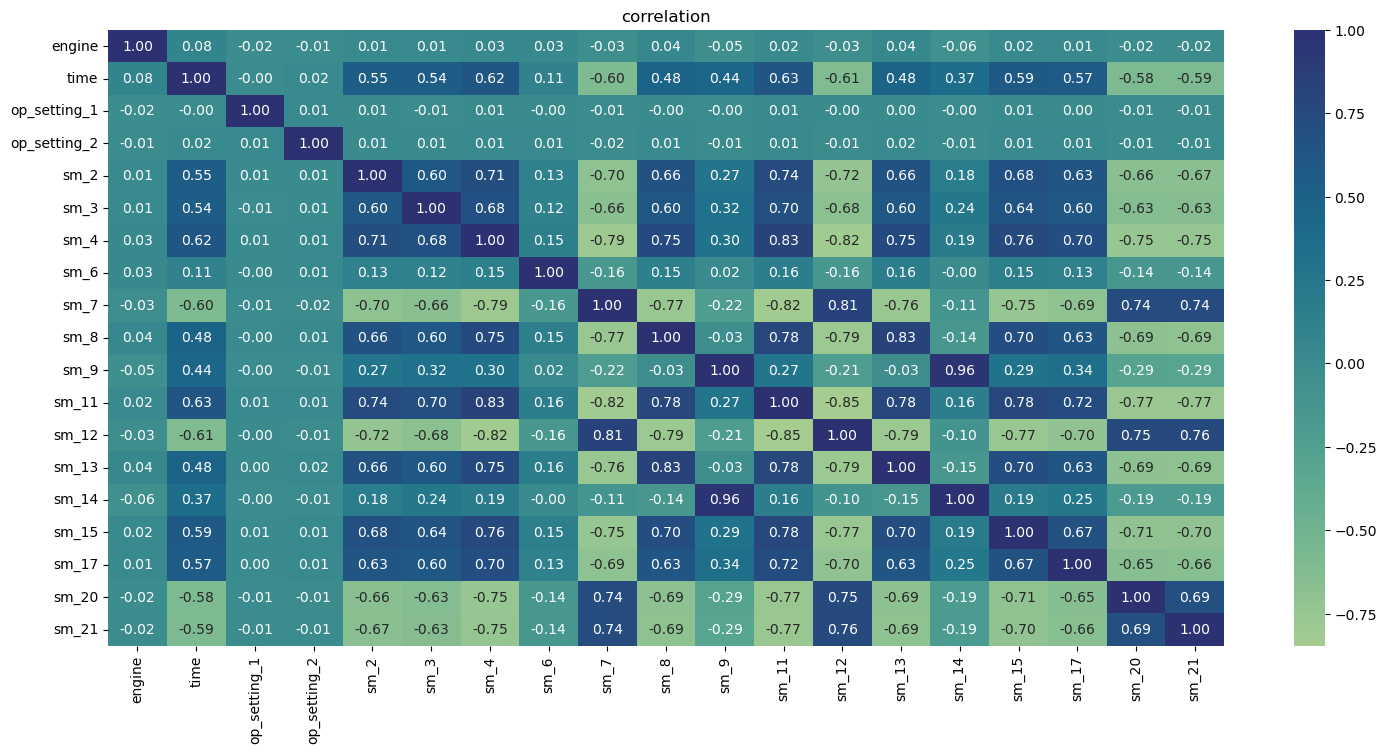

In [8]:
df_corr = data_train.corr()
plt.figure(figsize = (18,8))
plt.grid() , plt.title('correlation')
sns.heatmap(df_corr , annot=True , fmt = '0.2f' , cmap='crest');

In [9]:
work_time = data_train.groupby('engine')['time'].max()

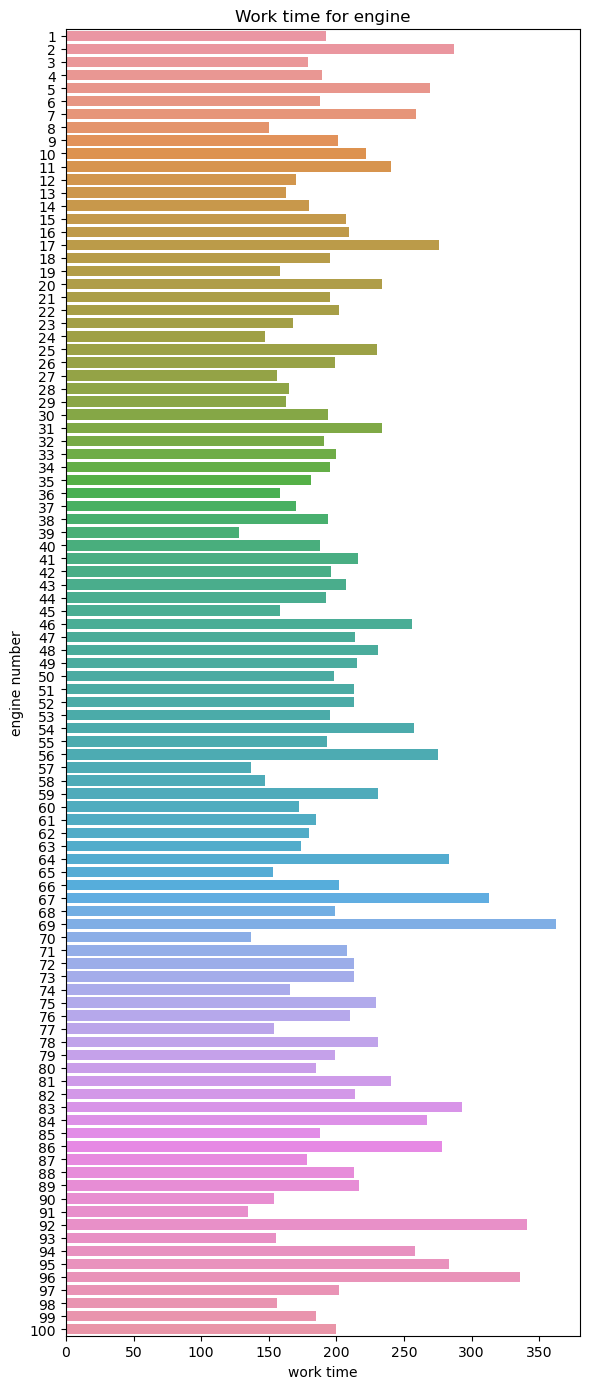

In [10]:
plt.figure(figsize = (6,14))
sns.barplot(y = work_time.index , x = work_time.values , orient='h')
plt.title('Work time for engine')
plt.xlabel('work time')
plt.ylabel('engine number')
plt.tight_layout()
plt.show();

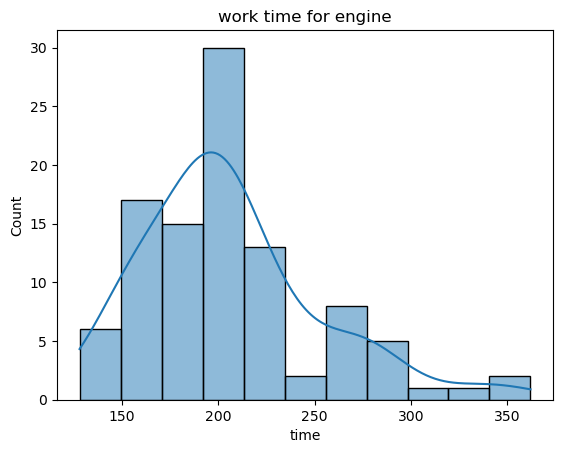

In [11]:
sns.histplot(work_time, kde=True)
plt.title('work time for engine');

In [12]:
data_train['rul'] = data_train.groupby('engine')['time'].transform('max') - data_train['time']

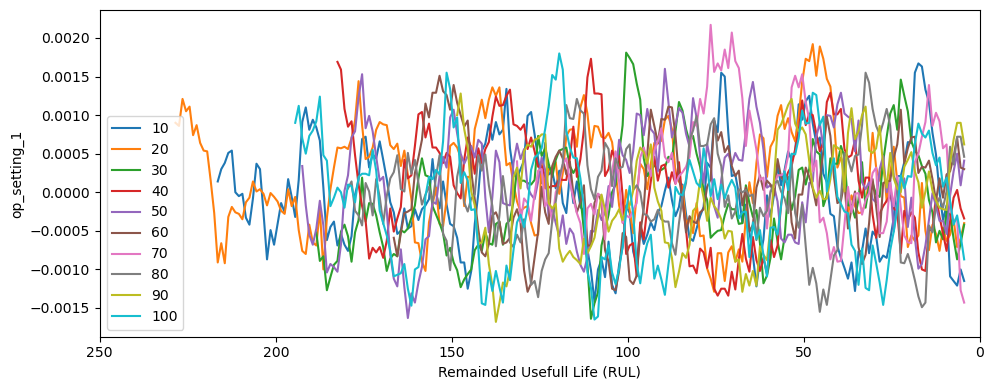

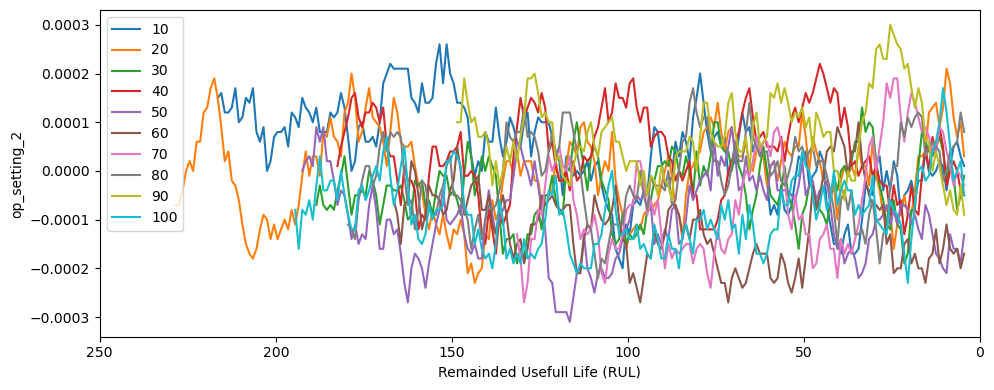

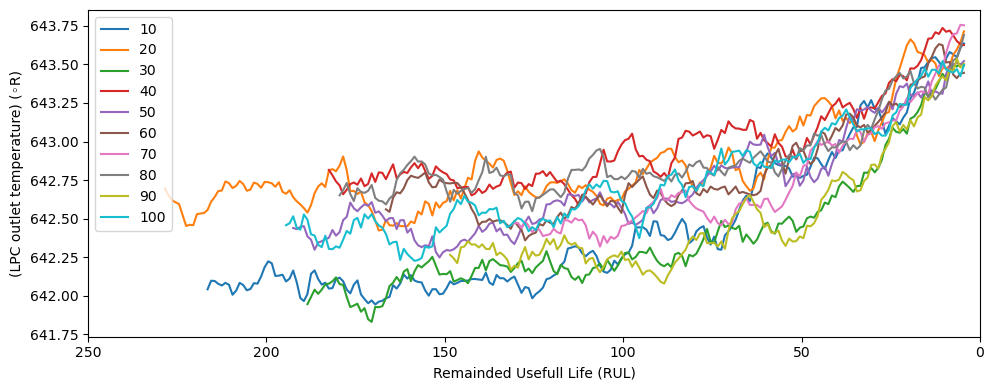

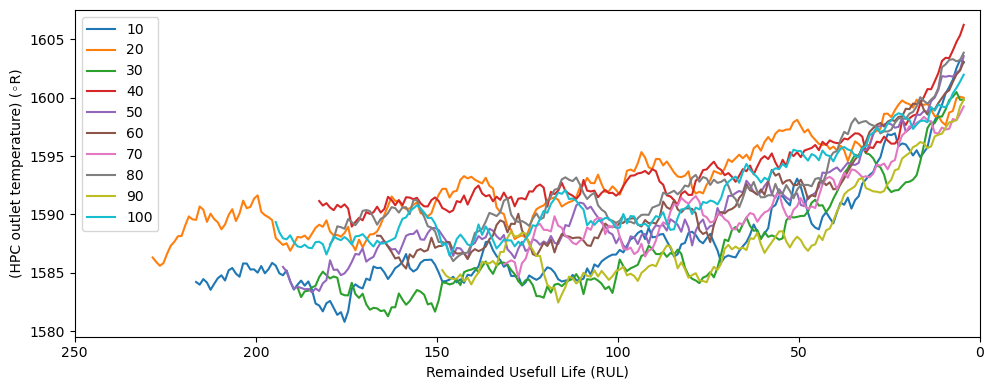

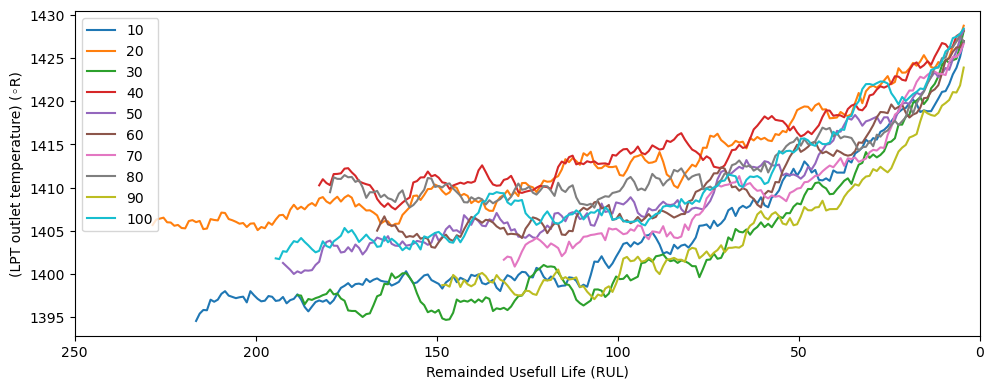

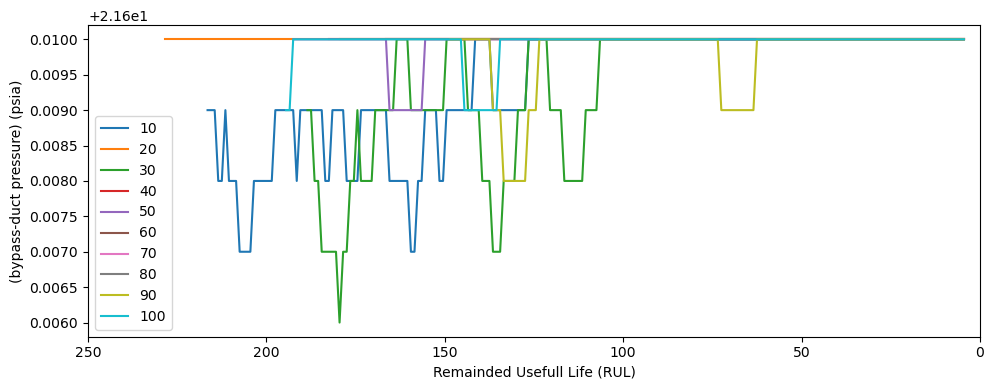

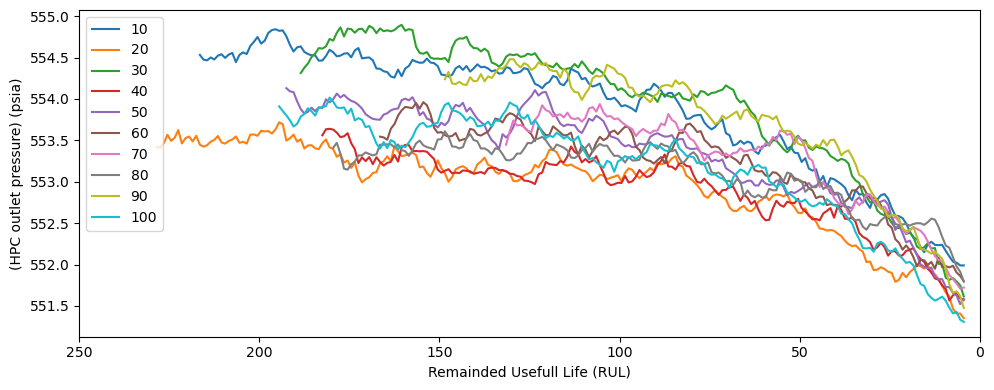

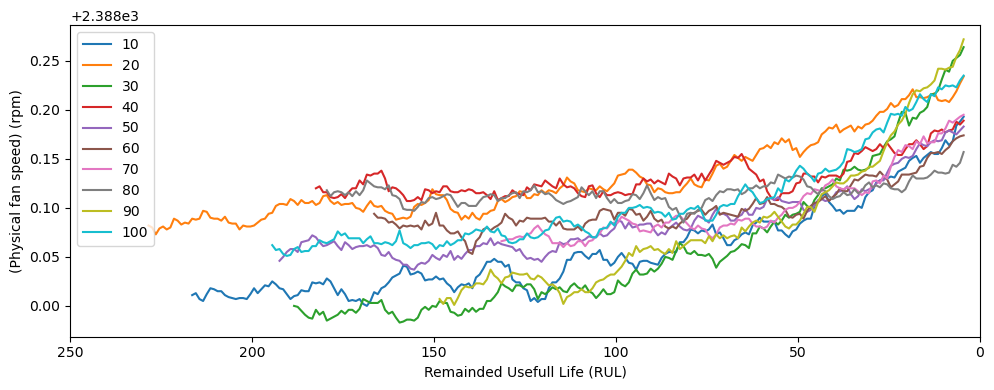

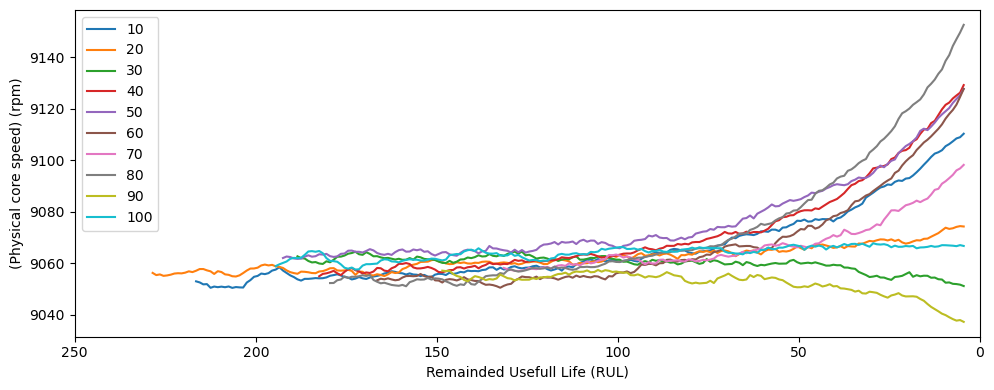

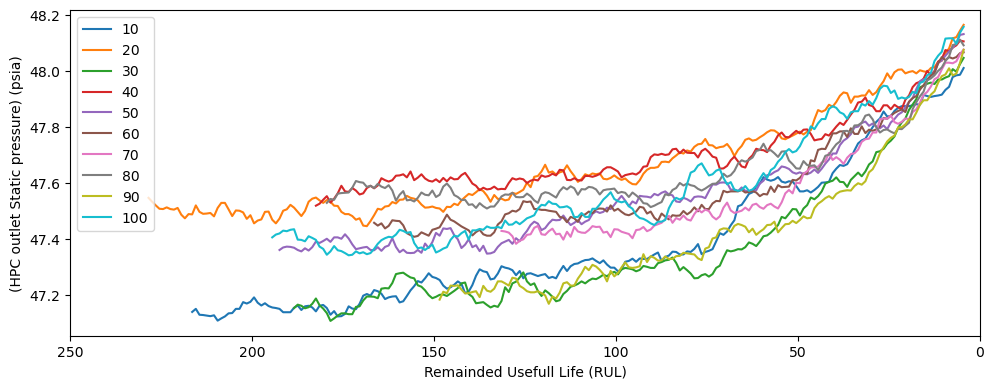

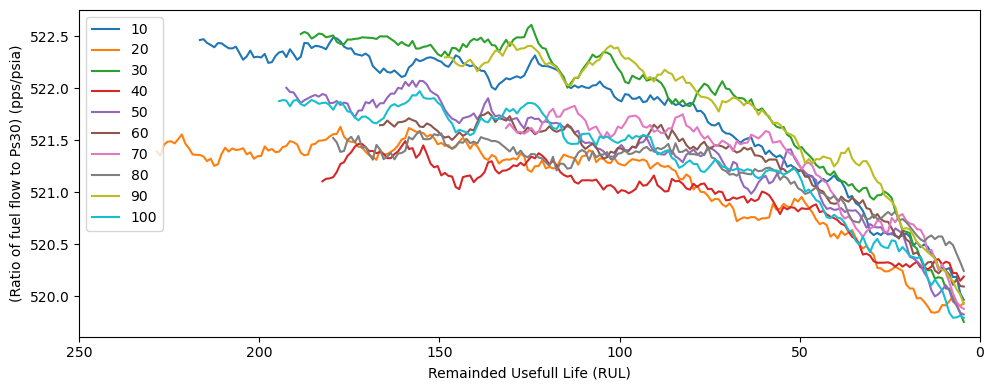

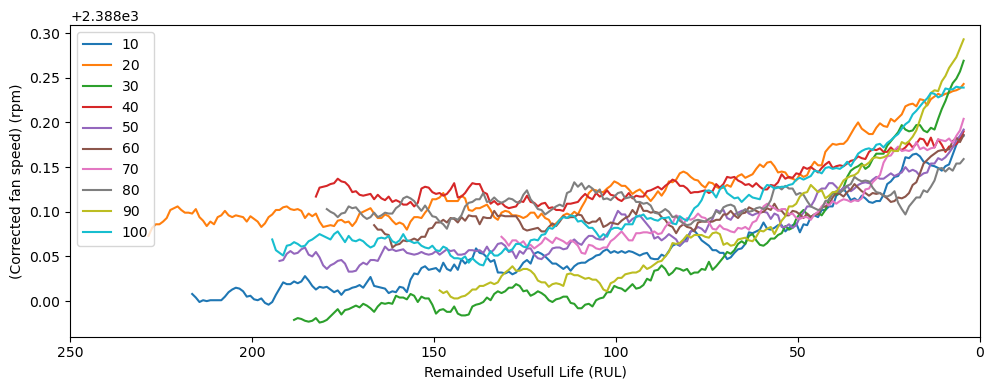

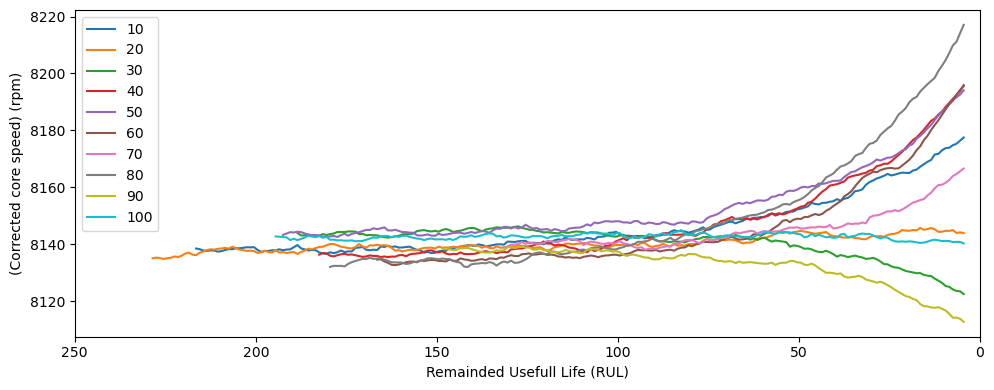

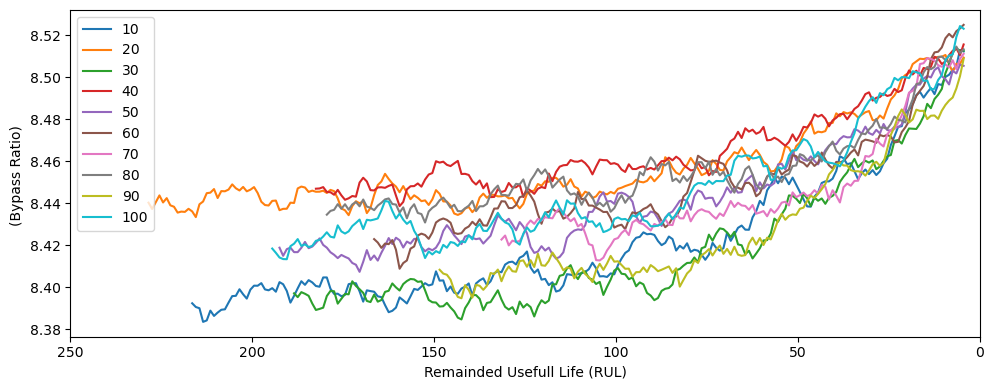

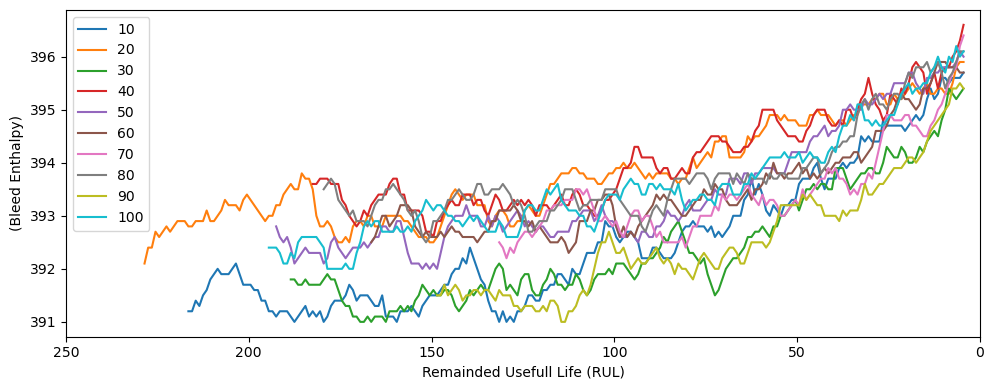

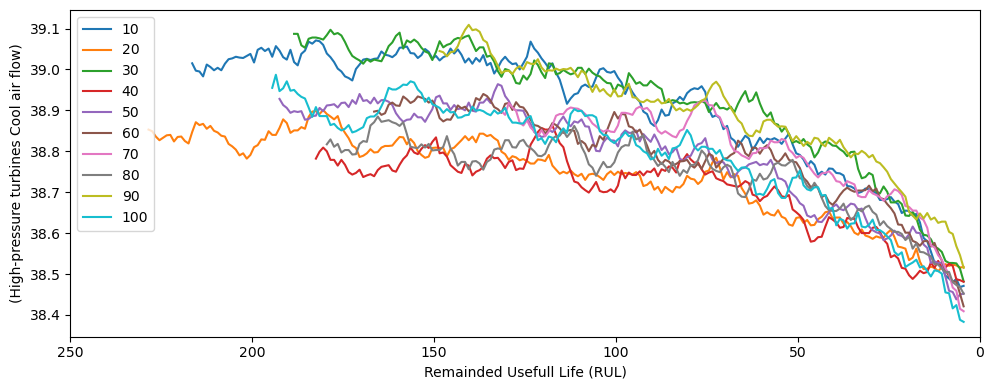

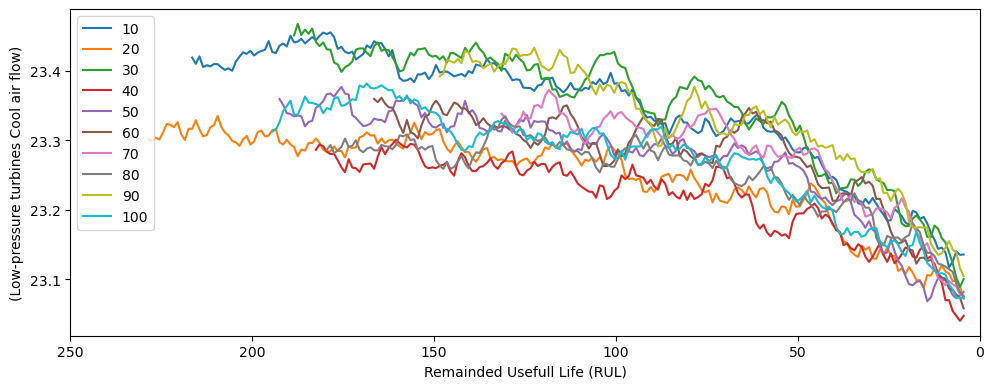

In [13]:
for col in features:
    figure = plt.figure(figsize=(10,4))
    for engine in data_train['engine'].unique():
        if (engine % 10 == 0):
            rolling_window = data_train[ data_train['engine']==engine].rolling(10).mean()
            sns.lineplot(data = rolling_window, x = 'rul' , y =col, label =engine)
    plt.tight_layout(), plt.xlim(250 , 0)
    plt.xlabel('Remainded Usefull Life (RUL)') , plt.ylabel(sensors.get(col,col))
    plt.show()

In [14]:
from sklearn.model_selection import train_test_split
X_train , X_val , y_train , y_val  = train_test_split(data_train[features], data_train['rul'], test_size=0.2)

In [15]:
X_test = data_test.groupby('engine').last().reset_index()
X_test = X_test[features]

In [16]:
from sklearn.preprocessing import MinMaxScaler , StandardScaler
scaler = MinMaxScaler(feature_range=(0,1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [17]:
from sklearn.metrics import mean_squared_error, r2_score

def metrics(y_true , y_pred , label = 'train'):
    return{
        "rmse":np.sqrt(mean_squared_error(y_true , y_pred)),
        "R2":r2_score(y_true , y_pred)
    }

In [18]:
from sklearn.linear_model import LinearRegression
model_lm = LinearRegression()
model_lm.fit(X_train , y_train)

y_pred = model_lm.predict(X_train)
print(metrics(y_train , y_pred))

y_pred = model_lm.predict(X_val)
print(metrics(y_val , y_pred))

y_pred = model_lm.predict(X_test)
print(metrics(y_test , y_pred))

{'rmse': 44.647991161028976, 'R2': 0.5775849381407522}
{'rmse': 44.75631360729698, 'R2': 0.5865568099216436}
{'rmse': 31.801343233835766, 'R2': 0.41435912041289513}


In [19]:
!pip install xgboost
import xgboost

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor 

model_lm = LinearRegression()
model_knn = KNeighborsRegressor()
model_tree = DecisionTreeRegressor()
model_forest = RandomForestRegressor()
model_svr = SVR()
model_mlp = MLPRegressor(max_iter=1000)
model_xgb = XGBRegressor()

models =[
    model_lm,
    model_knn,
    model_tree,
    model_forest,
    model_svr,
    model_mlp,
    model_xgb
]
for model in models:
    model.fit(X_train , y_train)
    y_pred = model.predict(X_test)
    print(type(model).__name__, metrics(y_test, y_pred))

LinearRegression {'rmse': 31.801343233835766, 'R2': 0.41435912041289513}
KNeighborsRegressor {'rmse': 35.484700928710105, 'R2': 0.27084013755294534}
DecisionTreeRegressor {'rmse': 45.10853577761087, 'R2': -0.1783055304233745}
RandomForestRegressor {'rmse': 31.83368651287501, 'R2': 0.4131672727344321}
SVR {'rmse': 25.979648797481772, 'R2': 0.6091527978484905}
MLPRegressor {'rmse': 31.361908891706808, 'R2': 0.4304321939932705}
XGBRegressor {'rmse': 35.98974048626898, 'R2': 0.24993669986724854}


In [21]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint, uniform

In [22]:
param_dist = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 3, 6],
    'max_features': ['log2', 'sqrt']
}
tuned_models = RandomizedSearchCV(model_tree, param_distributions=param_dist, n_iter=10 , cv=5)
tuned_models.fit(X_train , y_train)
model_tree = tuned_models.best_estimator_

In [23]:
param_dist = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 15],
    'metric': ['euclidean', 'manhattan']
}
tuned_models = GridSearchCV(model_knn, param_grid=param_dist, cv=5)
tuned_models.fit(X_train , y_train)
model_knn = tuned_models.best_estimator_

In [24]:
param_dist ={
    'max_depth' : [None , 10,20] , 
    'min_samples_split' : randint(2,10) , 
    'min_samples_leaf' :  randint(1,5)
} 
tuned_models = RandomizedSearchCV(model_forest, param_distributions=param_dist, n_iter=10 , cv=5)
tuned_models.fit(X_train , y_train)
model_forest = tuned_models.best_estimator_

Text(0.5, 1.0, 'random forest model')

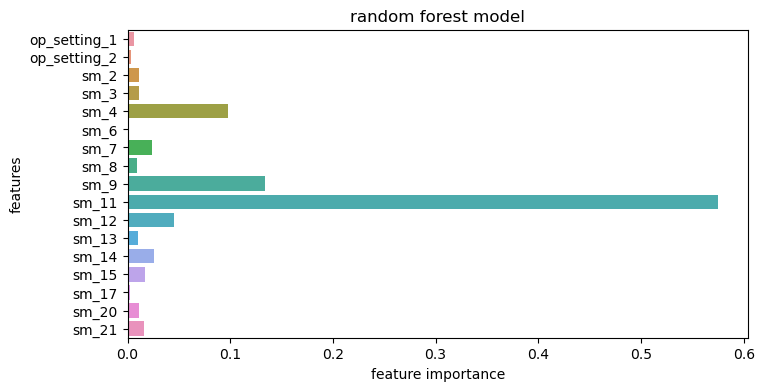

In [25]:
plt.figure(figsize = (8,4))
sns.barplot(y = features , x = model_forest.feature_importances_ )
plt.xlabel('feature importance')
plt.ylabel('features')
plt.title('random forest model')

In [26]:
param_dist = {
    'C': [10,20,30,50], 
    'kernel': ['rbf'],
    'gamma' : ['scale']
}

tuned_models = GridSearchCV(model_svr, param_grid=param_dist, cv=5)
tuned_models.fit(X_train , y_train)
model_svr = tuned_models.best_estimator_

In [27]:
from sklearn.model_selection import PredefinedSplit

param_dist = {
    'hidden_layer_sizes': [(10,), (50,), (100,), (50, 50), (100, 100), (50, 50, 50)],
    'alpha': [0.0001],
    'learning_rate': ['constant'],
    'max_iter': [1000]
}
tuned_models = GridSearchCV(model_mlp, param_grid=param_dist, cv=5)
tuned_models.fit(X_train , y_train)
model_mlp = tuned_models.best_estimator_

C:\Users\dmitry\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:412: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.array(param_list)


In [28]:
param_dist = {
    'n_estimators': randint(50, 500),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 15),
    'min_child_weight': randint(1, 10),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5),
    'gamma': uniform(0, 5),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(0, 1)
}
tuned_models = RandomizedSearchCV(model_xgb, param_distributions=param_dist, cv=5)
tuned_models.fit(X_train , y_train)
model_xgb = tuned_models.best_estimator_

In [29]:
print("Initial Models:")
for model in models:
    y_pred = model.predict(X_test)
    print(type(model).__name__, metrics(y_test, y_pred))

print("\nTuned Models:")
models_tuned =[
    model_lm,
    model_knn,
    model_tree,
    model_forest,
    model_svr,
    model_mlp,
    model_xgb
]
for model in models_tuned:
    y_pred = model.predict(X_test)
    print(type(model).__name__, metrics(y_test, y_pred))

Initial Models:
LinearRegression {'rmse': 31.801343233835766, 'R2': 0.41435912041289513}
KNeighborsRegressor {'rmse': 35.484700928710105, 'R2': 0.27084013755294534}
DecisionTreeRegressor {'rmse': 45.10853577761087, 'R2': -0.1783055304233745}
RandomForestRegressor {'rmse': 31.83368651287501, 'R2': 0.4131672727344321}
SVR {'rmse': 25.979648797481772, 'R2': 0.6091527978484905}
MLPRegressor {'rmse': 31.361908891706808, 'R2': 0.4304321939932705}
XGBRegressor {'rmse': 35.98974048626898, 'R2': 0.24993669986724854}

Tuned Models:
LinearRegression {'rmse': 31.801343233835766, 'R2': 0.41435912041289513}
KNeighborsRegressor {'rmse': 33.09723989834936, 'R2': 0.3656572048700787}
DecisionTreeRegressor {'rmse': 36.44214792207736, 'R2': 0.23096095664978544}
RandomForestRegressor {'rmse': 31.250536920899766, 'R2': 0.43447029362001643}
SVR {'rmse': 27.67960964427122, 'R2': 0.5563296788250645}
MLPRegressor {'rmse': 33.203732730828094, 'R2': 0.36156854735281396}
XGBRegressor {'rmse': 35.125683540192114, '

# Thank you